In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, brier_score_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GroupKFold
import shap 

c:\Users\Ntwyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tourneygames = pd.concat(
    [
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\MNCAATourneyDetailedResults.csv").assign(League = 'M'),
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\WNCAATourneyDetailedResults.csv").assign(League = 'W'),
    ],
).reset_index(drop=True)

regularseagames = pd.concat(
    [
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\MRegularSeasonDetailedResults.csv").assign(League = 'M'),
    ]
).reset_index(drop=True)

seeds = pd.concat(
    [    
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\MNCAATourneySeeds.csv").assign(League = 'M'),
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\WNCAATourneySeeds.csv").assign(League = 'W'),
    ]
).reset_index(drop=True)
teams = pd.read_csv("C:\Python\march-machine-learning-mania-2025\MTeams.csv")
kenpom = pd.read_csv("C:\Python\march-machine-learning-mania-2025\kenpom_2024.csv")

NameError: name 'pd' is not defined

In [4]:
season_games_win = regularseagames[['Season', 'League', 'WTeamID', 'DayNum', 'WScore', 'LScore', 'WFGM3', 'WFGA3', 'WFGM', 'WFGA', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WTO']].assign(result = 'W')
season_games_win.rename(
    columns={'WTeamID': 'TeamID', 
             'WScore': 'TeamScore', 
             'LScore': 'OppScore', 
             'WFGM3': 'threesmade', 
             'WFGA3': 'threesatt',
             'WFGM': 'FGMade',
             'WFGA': 'FGAtt',
             'WFTM': 'FTMade',
             'WFTA': 'FTAtt',
             'WOR': 'WOReb',
             'WDR': 'WDReb',
             'WTO': 'WTurnover'
             }, inplace=True)
season_games_win


,Season,League,TeamID,DayNum,TeamScore,OppScore,threesmade,threesatt,FGMade,FGAtt,FTMade,FTAtt,WOReb,WDReb,WTurnover,result
0,2003,M,1104,10,68,62,3,14,27,58,11,18,14,24,23,W
1,2003,M,1272,10,70,63,8,20,26,62,10,19,15,28,13,W
2,2003,M,1266,11,73,61,8,18,24,58,17,29,17,26,10,W
3,2003,M,1296,11,56,50,3,9,18,38,17,31,6,19,12,W
4,2003,M,1400,11,77,71,6,14,30,61,11,13,17,22,14,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196357,2025,W,3450,84,65,57,10,17,24,58,7,8,9,25,5,W
196358,2025,W,3129,85,89,80,11,25,33,73,12,13,7,32,9,W
196359,2025,W,3234,85,85,80,9,22,29,60,18,20,4,26,5,W
196360,2025,W,3337,85,55,43,10,29,21,50,3,3,7,30,6,W


In [5]:
season_games_loss = regularseagames[['Season', 'League', 'LTeamID', 'DayNum', 'WScore', 'LScore', 'LFGM3', 'LFGA3', 'LFGM', 'LFGA', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LTO']].assign(result = 'L')
season_games_loss.rename(
    columns={'LTeamID': 'TeamID', 
             'WScore': 'OppScore', 
             'LScore': 'TeamScore', 
             'LFGM3': 'threesmade', 
             'LFGA3': 'threesatt',
             'LFGM': 'FGMade',
             'LFGA': 'FGAtt',
             'LFTM': 'FTMade',
             'LFTA': 'FTAtt',
             'LOR': 'LOReb',
             'LDR': 'LDReb',
             'LTO': 'LTurnover'
             }, inplace=True)
season_games_loss

,Season,League,TeamID,DayNum,OppScore,TeamScore,threesmade,threesatt,FGMade,FGAtt,FTMade,FTAtt,LOReb,LDReb,LTurnover,result
0,2003,M,1328,10,68,62,2,10,22,53,16,22,10,22,18,L
1,2003,M,1393,10,70,63,6,24,24,67,9,20,20,25,12,L
2,2003,M,1437,11,73,61,3,26,22,73,14,23,31,22,12,L
3,2003,M,1457,11,56,50,6,22,18,49,8,15,17,20,19,L
4,2003,M,1208,11,77,71,6,16,24,62,17,27,21,15,10,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196357,2025,W,3333,84,65,57,6,30,22,67,7,9,11,23,8,L
196358,2025,W,3307,85,89,80,13,31,30,66,7,16,4,25,4,L
196359,2025,W,3321,85,85,80,9,15,29,60,13,20,6,25,8,L
196360,2025,W,3258,85,55,43,3,21,13,58,14,17,11,20,8,L


In [6]:
all_games = pd.concat([season_games_win, season_games_loss]).reset_index(drop=True)
all_games['Score_diff'] = all_games['TeamScore'] - all_games['OppScore']

all_games.loc[all_games['result'] == 'W', 'result'] = 1
all_games.loc[all_games['result'] == 'L', 'result'] = 0


In [7]:
team_agg = (
    all_games.groupby(['Season', 'TeamID', 'League'])
    .agg(
        AvgScoreDiff=('Score_diff', 'mean'),
        Wins=("result", lambda x: (x == 1).sum()),
        Losses= ("result", lambda x: (x == 0).sum()),
        Threepointavg = ('threesmade', lambda x: x.sum() / all_games.loc[x.index, 'threesatt'].sum()),
        FGAvg = ('FGMade', lambda x: x.sum() / all_games.loc[x.index, 'FGAtt'].sum()),
        Threesmade =('threesmade', 'sum'),
        FTAvg = ('FTMade', lambda x: x.sum() / all_games.loc[x.index, 'FTAtt'].sum()),
        FTMadeAvg = ('FTMade', 'mean'),
        OffReb =('WOReb', 'mean'),
        DefReb =('WDReb', 'mean'),
        Turnover =('WTurnover', 'mean')

    ).assign(winratio=lambda x: x['Wins'] / (x['Wins'] + x['Losses']))
            
            
            
            
            ).reset_index()
team_agg

,Season,TeamID,League,AvgScoreDiff,Wins,Losses,Threepointavg,FGAvg,Threesmade,FTAvg,FTMadeAvg,OffReb,DefReb,Turnover,winratio
0,2003,1102,M,0.250000,12,16,0.375643,0.481149,219,0.651357,11.142857,3.833333,19.333333,11.083333,0.428571
1,2003,1103,M,0.629630,13,14,0.338710,0.486074,147,0.736390,19.037037,9.384615,21.461538,12.538462,0.481481
2,2003,1104,M,4.285714,17,11,0.320144,0.420362,178,0.709898,14.857143,13.529412,26.411765,13.058824,0.607143
3,2003,1105,M,-4.884615,7,19,0.364815,0.395755,197,0.705986,15.423077,14.571429,25.857143,18.000000,0.269231
4,2003,1106,M,-0.142857,13,15,0.346154,0.423773,171,0.646421,10.642857,12.769231,28.000000,17.692308,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,2025,3476,W,-6.947368,8,11,0.330025,0.407540,133,0.794118,8.526316,11.250000,26.625000,6.375000,0.421053
13579,2025,3477,W,-13.562500,2,14,0.323120,0.375126,116,0.742081,10.250000,11.500000,24.000000,7.500000,0.125000
13580,2025,3478,W,-23.526316,2,17,0.294686,0.328141,122,0.742647,10.631579,9.500000,25.500000,6.000000,0.105263
13581,2025,3479,W,-7.812500,4,12,0.338509,0.408706,109,0.737589,13.000000,6.250000,27.250000,6.250000,0.250000


In [8]:
seeds['Seed'] = seeds['Seed'].str.replace(r'[a-zA-Z]', '', regex=True) # Remove letters
seeds['Seed'] = seeds['Seed'].str.replace('0', '', regex=False) # Remove zeros


team_agg = team_agg.merge(seeds, on=['Season', 'TeamID', 'League'], how='left')
team_agg = team_agg.merge(teams, on=['TeamID'], how='left')
team_agg = team_agg[['Season', 'League', 'TeamID', 'TeamName', 'AvgScoreDiff', 'Wins', 'Losses', 'Threepointavg', 'FGAvg', 'FTMadeAvg', 'winratio','Seed', 'Threesmade', 'FTAvg', 'OffReb', 'DefReb', 'Turnover']]

In [9]:
team_agg = team_agg.merge(kenpom, on=['Season', 'TeamName'], how='left')
team_agg = team_agg[team_agg['Season'] >= 2011]


In [10]:
team_agg

,Season,League,TeamID,TeamName,AvgScoreDiff,Wins,Losses,Threepointavg,FGAvg,FTMadeAvg,...,OffReb,DefReb,Turnover,Unnamed: 0,adj_o,adj_d,adj_tempo,luck,sos_adj_o,sos_adj_d
3032,2011,M,1102,Air Force,-0.535714,14,14,0.376258,0.468657,12.714286,...,5.857143,24.571429,11.071429,111.0,105.2,100.4,61.8,0.018,104.2,98.5
3033,2011,M,1103,Akron,3.647059,22,12,0.360215,0.429820,12.911765,...,9.636364,25.909091,11.863636,132.0,102.0,98.8,67.0,0.033,100.0,103.0
3034,2011,M,1104,Alabama,7.406250,21,11,0.298405,0.444941,12.812500,...,13.000000,25.619048,13.666667,45.0,103.1,88.7,65.2,-0.022,102.0,100.0
3035,2011,M,1105,Alabama A&M,-3.440000,10,15,0.285333,0.397133,14.200000,...,11.900000,29.500000,16.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3036,2011,M,1106,Alabama St,-2.875000,15,17,0.292220,0.397741,14.937500,...,13.800000,25.333333,15.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,2025,W,3476,NaN,-6.947368,8,11,0.330025,0.407540,8.526316,...,11.250000,26.625000,6.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13579,2025,W,3477,NaN,-13.562500,2,14,0.323120,0.375126,10.250000,...,11.500000,24.000000,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13580,2025,W,3478,NaN,-23.526316,2,17,0.294686,0.328141,10.631579,...,9.500000,25.500000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13581,2025,W,3479,NaN,-7.812500,4,12,0.338509,0.408706,13.000000,...,6.250000,27.250000,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tourney_games_win = tourneygames[['Season', 'League', 'WTeamID', 'LTeamID', 'DayNum', 'WScore', 'LScore', 'WFGM3', 'WFGA3', 'WFGM', 'WFGA', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WTO' ]].assign(result = 'W')
tourney_games_win.rename(
    columns={'WTeamID': 'TeamID', 
             'LTeamID': 'OppTeamID', 
             'WScore': 'TeamScore', 
             'LScore': 'OppScore', 
             'WFGM3': 'threesmade', 
             'WFGA3': 'threesatt',
             'WFGM': 'FGMade',
             'WFGA': 'FGAtt',
             'WFTM': 'FTMade',
             'WFTA': 'FTAtt',
             'WOR': 'WOReb',
             'WDR': 'WDReb',
             'WTO': 'WTurnover'
             }, inplace=True)
tourney_games_win

,Season,League,TeamID,OppTeamID,DayNum,TeamScore,OppScore,threesmade,threesatt,FGMade,FGAtt,FTMade,FTAtt,WOReb,WDReb,WTurnover,result
0,2003,M,1421,1411,134,92,84,11,29,32,69,17,26,14,30,12,W
1,2003,M,1112,1436,136,80,51,7,23,31,66,11,14,11,36,16,W
2,2003,M,1113,1272,136,84,71,6,14,31,59,16,22,10,27,9,W
3,2003,M,1141,1166,136,79,73,3,7,29,53,18,25,11,20,18,W
4,2003,M,1143,1301,136,76,74,7,20,27,64,15,23,18,20,13,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2024,W,3163,3425,147,80,73,7,15,28,58,17,27,5,30,12,W
2272,2024,W,3234,3261,147,94,87,13,31,32,69,17,22,3,29,11,W
2273,2024,W,3234,3163,151,71,69,7,25,27,59,10,14,9,23,16,W
2274,2024,W,3376,3301,151,78,59,8,19,33,66,4,4,10,34,15,W


In [12]:
tourney_games_loss = tourneygames[['Season', 'League', 'LTeamID', 'WTeamID', 'DayNum', 'WScore', 'LScore', 'LFGM3', 'LFGA3', 'LFGM', 'LFGA', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LTO']].assign(result = 'L')
tourney_games_loss.rename(
    columns={'LTeamID': 'TeamID', 
             'WTeamID': 'OppTeamID', 
             'WScore': 'OppScore', 
             'LScore': 'TeamScore', 
             'LFGM3': 'threesmade', 
             'LFGA3': 'threesatt',
             'LFGM': 'FGMade',
             'LFGA': 'FGAtt',
             'LFTM': 'FTMade',
             'LFTA': 'FTAtt',
             'LOR': 'LOReb',
             'LDR': 'LDReb',
             'LTO': 'LTurnover'
             }, inplace=True)
tourney_games_loss

,Season,League,TeamID,OppTeamID,DayNum,OppScore,TeamScore,threesmade,threesatt,FGMade,FGAtt,FTMade,FTAtt,LOReb,LDReb,LTurnover,result
0,2003,M,1411,1421,134,92,84,12,31,29,67,14,31,17,28,15,L
1,2003,M,1436,1112,136,80,51,4,16,20,64,7,7,8,26,17,L
2,2003,M,1272,1113,136,84,71,7,28,25,69,14,21,20,22,12,L
3,2003,M,1166,1141,136,79,73,7,17,27,60,12,17,14,17,21,L
4,2003,M,1301,1143,136,76,74,9,21,25,56,15,20,10,26,14,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2024,W,3425,3163,147,80,73,9,29,23,70,18,20,10,25,9,L
2272,2024,W,3261,3234,147,94,87,8,24,34,88,11,17,21,28,13,L
2273,2024,W,3163,3234,151,71,69,8,25,29,63,3,4,6,22,14,L
2274,2024,W,3301,3376,151,78,59,6,23,20,62,13,18,10,18,12,L


In [13]:
all_games_tourney = pd.concat([tourney_games_win, tourney_games_loss]).reset_index(drop=True)
all_games_tourney['Score_diff'] = all_games_tourney['TeamScore'] - all_games_tourney['OppScore']

all_games_tourney.loc[all_games_tourney['result'] == 'W', 'result'] = 1
all_games_tourney.loc[all_games_tourney['result'] == 'L', 'result'] = 0


In [14]:
all_games_tourney = all_games_tourney[all_games_tourney['Season'] >= 2011]


In [15]:
tourneynseason = all_games_tourney.merge(
    team_agg[['Season', 'League', 'TeamID', 'AvgScoreDiff', 'Threepointavg', 'FGAvg', 'winratio','Seed','adj_tempo', 'sos_adj_o', 'sos_adj_d', 'Threesmade', 'FTAvg', 'FTMadeAvg', 'OffReb', 'DefReb', 'Turnover']], 
    on=['Season', 'TeamID', 'League'], 
    how='left',
).merge(
    team_agg[['Season', 'League', 'TeamID', 'AvgScoreDiff', 'Threepointavg', 'FGAvg', 'winratio','Seed','adj_tempo', 'sos_adj_o', 'sos_adj_d', 'Threesmade', 'FTAvg', 'FTMadeAvg', 'OffReb', 'DefReb', 'Turnover']].rename(
        columns={
        "TeamID": "OppTeamID",
        "AvgScoreDiff": "OppAvgScoreDiff",
        "Threepointavg": "OppThreepointavg",
        "FGAvg": "OppFGAvg",
        "winratio": "Oppwinratio",
        "Seed": "OppSeed",
        "adj_tempo": "Oppadjtempo",
        "sos_adj_o": "Oppsos_adj_o",
        "sos_adj_d": "Oppsos_adj_d",
        "Threesmade": "OppThreesmade",
        "FTAvg": "OppFTAvg",
        "FTMadeAvg": "OppFTMadeAvg",
        "OffReb": "OppOffReb",
        "DefReb": "OppDefReb",
        "Turnover": "OppTurnover"
        }
    ), 
    on=["Season", 'League', "OppTeamID"]
)
tourneynseason

,Season,League,TeamID,OppTeamID,DayNum,TeamScore,OppScore,threesmade,threesatt,FGMade,...,OppSeed,Oppadjtempo,Oppsos_adj_o,Oppsos_adj_d,OppThreesmade,OppFTAvg,OppFTMadeAvg,OppOffReb,OppDefReb,OppTurnover
0,2011,M,1155,1412,134,70,52,4,13,26,...,12,62.9,103.2,100.2,227,0.719368,12.133333,11.045455,25.181818,11.681818
1,2011,M,1421,1114,134,81,77,4,12,27,...,16,NaN,NaN,NaN,221,0.694482,15.636364,9.882353,24.294118,11.588235
2,2011,M,1427,1106,135,70,61,4,16,23,...,16,NaN,NaN,NaN,154,0.608917,14.937500,13.800000,25.333333,15.333333
3,2011,M,1433,1425,135,59,46,9,24,20,...,11,NaN,NaN,NaN,203,0.653291,12.333333,9.210526,26.842105,11.210526
4,2011,M,1139,1330,136,60,58,7,26,22,...,9,61.4,103.4,101.5,161,0.663636,13.272727,15.703704,24.629630,12.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,2024,W,3314,3376,139,41,88,3,18,15,...,1,NaN,NaN,NaN,207,0.685668,13.156250,12.406250,29.718750,13.156250
3398,2024,W,3231,3376,144,75,79,13,33,28,...,1,NaN,NaN,NaN,207,0.685668,13.156250,12.406250,29.718750,13.156250
3399,2024,W,3333,3376,146,58,70,8,25,20,...,1,NaN,NaN,NaN,207,0.685668,13.156250,12.406250,29.718750,13.156250
3400,2024,W,3301,3376,151,59,78,6,23,20,...,1,NaN,NaN,NaN,207,0.685668,13.156250,12.406250,29.718750,13.156250


In [16]:
tourneynseason['result'] = tourneynseason['result'].astype('int')
tourneynseason['Seed'] = tourneynseason['Seed'].astype('int')
tourneynseason['OppSeed'] = tourneynseason['OppSeed'].astype('int')
tourneynseason['AvgScoreDiff'] = tourneynseason['AvgScoreDiff'].astype('int')


In [17]:
#X = tourneynseason[[ 'AvgScoreDiff', 'Seed', 'OppSeed', 'FTAvg', 'OppFTAvg', 'Threepointavg','OppThreepointavg', 'OffReb', 'OppOffReb', 'DefReb', 'OppDefReb', 'Turnover', 'OppTurnover', 'adj_tempo','sos_adj_o','sos_adj_d', 'Oppadjtempo', 'winratio', 'Oppwinratio']]
#X = tourneynseason[['Threepointavg', 'OppThreepointavg', 'FTAvg', 'OppFTAvg', 'Seed', 'OppSeed','adj_tempo','sos_adj_o','sos_adj_d', 'Oppadjtempo']]
X = tourneynseason[['OffReb','OppOffReb', 'FTAvg', 'OppFTAvg', 'FGAvg', 'OppFGAvg', 'Threepointavg' , 'OppThreepointavg', 'Turnover', 'OppTurnover', 'Seed', 'OppSeed']]
y = tourneynseason[['result']]

['XGB']
['XGB', 'MLP']
['XGB', 'MLP', 'LR']
['XGB', 'MLP', 'LR', 'LDA']
['XGB', 'MLP', 'LR', 'LDA', 'KNN']
['XGB', 'MLP', 'LR', 'LDA', 'KNN', 'CART']
['XGB', 'MLP', 'LR', 'LDA', 'KNN', 'CART', 'NB']
['XGB', 'MLP', 'LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']


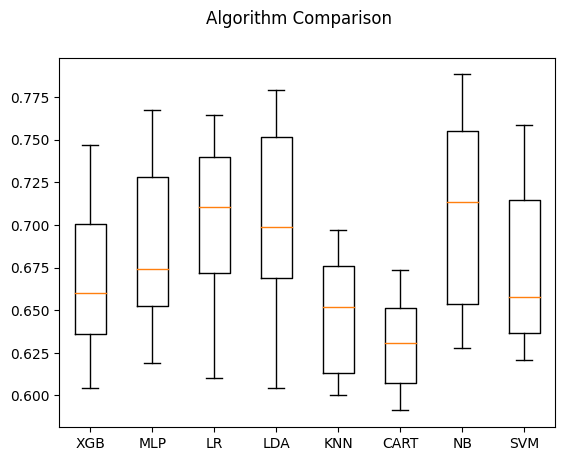

In [18]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


seed = 7
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(names)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create LDA object
LR = LogisticRegression()

# Fit LDA model to training data
LR_model = LR.fit(X_train, y_train)

# # Transform training and testing data
# X_train_transformed = LR.transform(X_train)
# X_test_transformed = LR.transform(X_test)

# Make predictions on the test set
y_pred = LR.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = brier_score_loss(y_test, y_pred)
# print("Accuracy:", accuracy)

print(y_pred)


[0.65632302 0.78392881 0.67090571 0.62369892 0.25380201 0.7768497
 0.32949989 0.63277516 0.18893994 0.07743644 0.05537984 0.5077407
 0.70351872 0.65792689 0.53845078 0.35277598 0.42488415 0.73931256
 0.84026503 0.72376321 0.5295451  0.06784166 0.12785385 0.50087641
 0.65101699 0.8397686  0.43080675 0.5258862  0.69026411 0.27269522
 0.93610791 0.19568569 0.29673293 0.7041038  0.51589352 0.23452089
 0.60453324 0.38485515 0.25949745 0.95855911 0.8853646  0.53662199
 0.40729533 0.17960171 0.32798568 0.04757204 0.09255612 0.56662512
 0.58227502 0.6817513  0.87113557 0.72507245 0.86538612 0.25870025
 0.44102994 0.08807068 0.52397781 0.54020234 0.3779962  0.89770938
 0.74363784 0.60060646 0.60027356 0.77657171 0.07035096 0.16269778
 0.70716747 0.23963668 0.28144166 0.67702251 0.34736713 0.2935045
 0.09231331 0.86689645 0.58493641 0.2975741  0.49443528 0.80658139
 0.65885555 0.64727858 0.50019773 0.21686593 0.73890179 0.3305826
 0.46814992 0.80033181 0.30852813 0.73224579 0.20832199 0.4790472


<Axes: ylabel='Feature'>

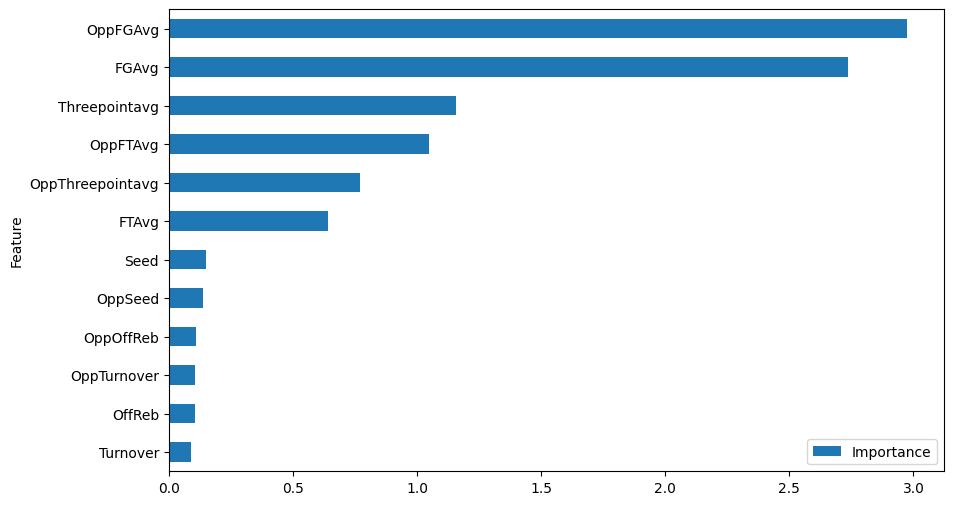

In [20]:
coefficients = LR_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [211]:
#might need to remove 2025 from data above **********
seeds_2025 = pd.concat(
    [    
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\MNCAATourneySeeds.csv").assign(League = 'M'),
        pd.read_csv("C:\Python\march-machine-learning-mania-2025\WNCAATourneySeeds.csv").assign(League = 'W'),
    ]
).reset_index(drop=True)

submission_df = pd.read_csv("C:\Python\march-machine-learning-mania-2025\SampleSubmissionStage2.csv")


In [212]:

seeds_2025 = seeds_2025.query('Season == 2025')
seeds_2025

,Season,Seed,TeamID,League
2558,2025,W01,1181,M
2559,2025,W02,1104,M
2560,2025,W03,1458,M
2561,2025,W04,1112,M
2562,2025,W05,1332,M
...,...,...,...,...
4365,2025,Z12,3193,W
4366,2025,Z13,3251,W
4367,2025,Z14,3195,W
4368,2025,Z15,3117,W


In [213]:
def extract_game_info(id_str):
    # Extract year and team_ids
    parts = id_str.split('_')
    year = int(parts[0])
    teamID1 = int(parts[1])
    teamID2 = int(parts[2])
    return year, teamID1, teamID2

def extract_seed_value(seed_str):
    # Extract seed value
    try:
        return int(seed_str[1:])
    # Set seed to 16 for unselected teams and errors
    except ValueError:
        return 16

# Reformat the data
submission_df[['Season', 'TeamID1', 'TeamID2']] = submission_df['ID'].apply(extract_game_info).tolist()
seeds_2025['SeedValue'] = seeds_2025['Seed'].apply(extract_seed_value)

# Merge seed information for TeamID1
submission_df = pd.merge(submission_df, seeds_2025[['Season', 'TeamID', 'SeedValue']],
                         left_on=['Season', 'TeamID1'], right_on=['Season', 'TeamID'],
                         how='left')
submission_df = submission_df.rename(columns={'SeedValue': 'SeedValue1'}).drop(columns=['TeamID'])
seeds_2025
# # Merge seed information for TeamID2
submission_df = pd.merge(submission_df, seeds_2025[['Season', 'TeamID', 'SeedValue']],
                         left_on=['Season', 'TeamID2'], right_on=['Season', 'TeamID'],
                         how='left')
submission_df = submission_df.rename(columns={'SeedValue': 'SeedValue2'}).drop(columns=['TeamID'])

In [214]:
submission_df = submission_df.rename(
    columns={
        "TeamID1": "TeamID",
        "TeamID2": "OppTeamID",
        "SeedValue1": "Seed",
        "SeedValue2": "OppSeed"
    }
)
submission_df

,ID,Pred,Season,TeamID,OppTeamID,Seed,OppSeed
0,2025_1101_1102,0.5,2025,1101,1102,NaN,NaN
1,2025_1101_1103,0.5,2025,1101,1103,NaN,13.0
2,2025_1101_1104,0.5,2025,1101,1104,NaN,2.0
3,2025_1101_1105,0.5,2025,1101,1105,NaN,NaN
4,2025_1101_1106,0.5,2025,1101,1106,NaN,16.0
...,...,...,...,...,...,...,...
131402,2025_3477_3479,0.5,2025,3477,3479,NaN,NaN
131403,2025_3477_3480,0.5,2025,3477,3480,NaN,NaN
131404,2025_3478_3479,0.5,2025,3478,3479,NaN,NaN
131405,2025_3478_3480,0.5,2025,3478,3480,NaN,NaN


In [215]:
submission_df = (
    submission_df.merge(
        team_agg[['Season', 'League', 'TeamID', 'OffReb', 'FTAvg', 'FGAvg', 'Threepointavg' , 'Turnover']],
        on=['Season', 'TeamID'],
        how='left'

    )
).merge (
    team_agg[['Season', 'League', 'TeamID', 'OffReb', 'FTAvg', 'FGAvg', 'Threepointavg' , 'Turnover']].rename(
        columns={
            "TeamID": "OppTeamID",
            "OffReb": "OppOffReb",
            "FTAvg": "OppFTAvg",
            "FGAvg": "OppFGAvg",
            "Threepointavg": "OppThreepointavg",
            "Turnover": "OppTurnover",
            "Seed": "OppSeed"
        }
    ),
    on=['Season', 'OppTeamID']
)

In [216]:
submission_df= submission_df.dropna(subset=['Seed'])
submission_df= submission_df.dropna(subset=['OppSeed'])

In [217]:
X_new = submission_df[['OffReb','OppOffReb', 'FTAvg', 'OppFTAvg', 'FGAvg', 'OppFGAvg', 'Threepointavg' , 'OppThreepointavg', 'Turnover', 'OppTurnover', 'Seed', 'OppSeed']]
#y_new = submission_df[['target']]

In [218]:
predictions = LR_model.predict_proba(X_new)[:,1]
predictions

array([0.13817307, 0.68175938, 0.92774008, ..., 0.85261463, 0.73921223,
       0.52787423])

In [219]:
submission_df['Pred'] = predictions

In [220]:
teams = teams.rename(
    {
        "LastD1Season": "Season"
    }
)

In [238]:
test1 = submission_df.merge(teams, on=['Season', 'TeamID'], how='left').rename(
    columns={
        "TeamName": "FirstTeam",
    }
)
test2 = submission_df.merge(teams, left_on=['Season', 'OppTeamID'], right_on=['Season', 'TeamID'] , how='left').rename(
    columns={
        "TeamID_x": "TeamID",
        "TeamID_y": "OppTeamID",
        "TeamName": "SecTeamName"
    }
)

In [239]:
test2

,ID,Pred,Season,TeamID,OppTeamID,Seed,OppSeed,League_x,OffReb,FTAvg,...,Turnover,League_y,OppOffReb,OppFTAvg,OppFGAvg,OppThreepointavg,OppTurnover,OppTeamID,SecTeamName,FirstD1Season
0,2025_1103_1104,0.138173,2025,1103,1104,13.0,2.0,M,11.076923,0.751701,...,7.307692,M,12.470588,0.709386,0.473152,0.324590,7.058824,1104.0,Alabama,1985.0
1,2025_1103_1106,0.681759,2025,1103,1106,13.0,16.0,M,11.076923,0.751701,...,7.307692,M,7.857143,0.685333,0.403172,0.326296,6.571429,1106.0,Alabama St,1985.0
2,2025_1104_1106,0.927740,2025,1104,1106,2.0,16.0,M,12.470588,0.709386,...,7.058824,M,7.857143,0.685333,0.403172,0.326296,6.571429,1106.0,Alabama St,1985.0
3,2025_1103_1110,0.684254,2025,1103,1110,13.0,16.0,M,11.076923,0.751701,...,7.307692,M,6.000000,0.764890,0.438856,0.354978,6.800000,1110.0,American Univ,1985.0
4,2025_1104_1110,0.928509,2025,1104,1110,2.0,16.0,M,12.470588,0.709386,...,7.058824,M,6.000000,0.764890,0.438856,0.354978,6.800000,1110.0,American Univ,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,2025_3436_3471,0.611504,2025,3436,3471,15.0,16.0,W,7.181818,0.703863,...,7.363636,W,8.875000,0.685358,0.388385,0.315934,11.500000,NaN,NaN,NaN
4552,2025_3449_3471,0.686103,2025,3449,3471,16.0,16.0,W,10.384615,0.782609,...,7.076923,W,8.875000,0.685358,0.388385,0.315934,11.500000,NaN,NaN,NaN
4553,2025_3452_3471,0.852615,2025,3452,3471,6.0,16.0,W,13.062500,0.768473,...,15.312500,W,8.875000,0.685358,0.388385,0.315934,11.500000,NaN,NaN,NaN
4554,2025_3453_3471,0.739212,2025,3453,3471,12.0,16.0,W,8.466667,0.779468,...,7.200000,W,8.875000,0.685358,0.388385,0.315934,11.500000,NaN,NaN,NaN


In [245]:
test = pd.merge(test1, test2, on=['ID', 'Season'], how='inner')
test = test[['ID', 'Pred_x', 'Season', 'TeamID_x', 'Seed_x', 'FirstTeam', 'OppTeamID_x', 'OppSeed_x', 'SecTeamName']]
pd.set_option('display.max_rows', None)
test.sort_values(by='FirstTeam', ascending=True)

,ID,Pred_x,Season,TeamID_x,Seed_x,FirstTeam,OppTeamID_x,OppSeed_x,SecTeamName
0,2025_1103_1104,0.138173,2025,1103,13.0,Akron,1104,2.0,Alabama
1596,2025_1103_1407,0.553308,2025,1103,13.0,Akron,1407,14.0,Troy
325,2025_1103_1246,0.184031,2025,1103,13.0,Akron,1246,3.0,Kentucky
1653,2025_1103_1417,0.332510,2025,1103,13.0,Akron,1417,7.0,UCLA
300,2025_1103_1242,0.288327,2025,1103,13.0,Akron,1242,7.0,Kansas
1711,2025_1103_1423,0.515300,2025,1103,13.0,Akron,1423,14.0,UNC Wilmington
276,2025_1103_1235,0.236821,2025,1103,13.0,Akron,1235,3.0,Iowa St
1770,2025_1103_1429,0.433827,2025,1103,13.0,Akron,1429,10.0,Utah St
253,2025_1103_1228,0.185451,2025,1103,13.0,Akron,1228,6.0,Illinois
1830,2025_1103_1433,0.441785,2025,1103,13.0,Akron,1433,11.0,VCU


In [ ]:
test[['ID', 'Pred', "TeamID_x", "TeamName_x", 'Seed', 'TeamID_y', 'TeamName', 'OppSeed']]

KeyError: "['TeamName_x'] not in index"